<a href="https://colab.research.google.com/github/anjaliharidevan-glitch/Internship/blob/main/week_3/MNIST_handwrittendata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Task**

* Load MNIST dataset (Hand written digits dataset)

* Train DNN and experiment with different number of layers and neurons.

* Now train the DNN with only two class from the dataset (A binary classifier using DNN)

* Apply Normalization to the image data and then train, and analyze the improvement.

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [4]:
hand_written = keras.datasets.mnist
(x_train,y_train), (x_test, y_test) = hand_written.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

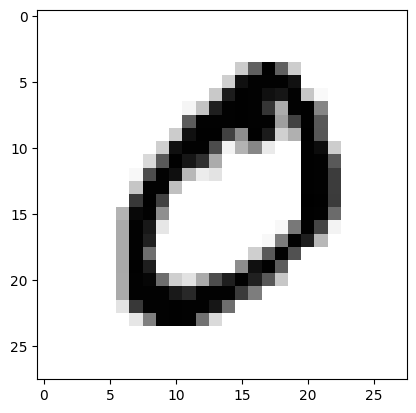

In [9]:
plt.imshow(x_train[1], cmap = 'binary')
plt.show()

In [10]:
y_train[1]

np.uint8(0)

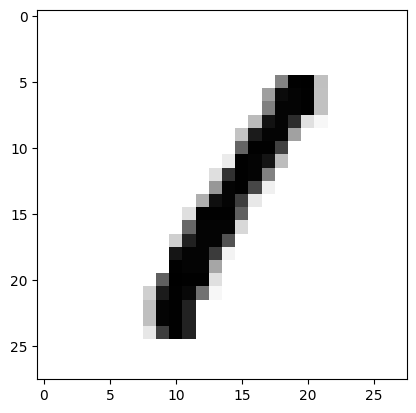

In [11]:
plt.imshow(x_train[3], cmap = 'binary')
plt.show()

In [12]:
y_train[3]

np.uint8(1)

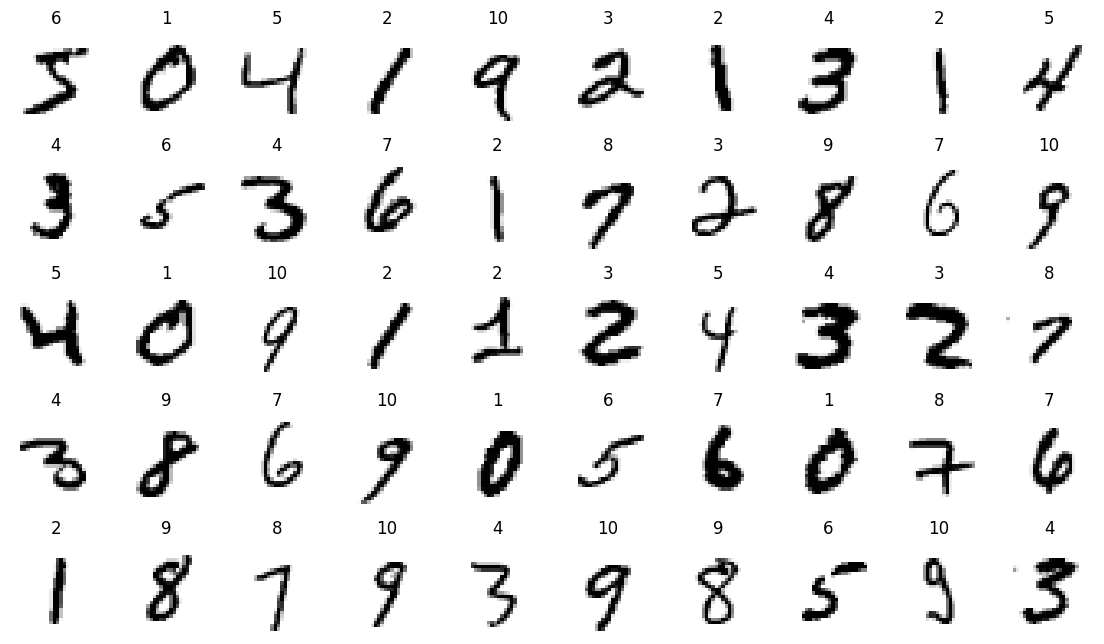

In [13]:
class_names = [1,2,3,4,5,6,7,8,9,10]

n_rows = 5
n_cols = 10
plt.figure(figsize = (n_cols*1.4, n_rows*1.6))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap = 'binary', interpolation = 'nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]])

In [14]:
ANN = keras.models.Sequential()
ANN.add(keras.layers.Flatten(input_shape = [28,28]))
ANN.add(keras.layers.Dense(100, activation = 'relu'))
ANN.add(keras.layers.Dense(10, activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
ANN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
ANN.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
tbCallBack = keras.callbacks.TensorBoard(log_dir = "tbGraph/")

In [18]:
history_ANN = ANN.fit(x_train, y_train, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7823 - loss: 7.3651 - val_accuracy: 0.9023 - val_loss: 0.4463
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8920 - loss: 0.4768 - val_accuracy: 0.9247 - val_loss: 0.3341
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9196 - loss: 0.3347 - val_accuracy: 0.9347 - val_loss: 0.2688
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9330 - loss: 0.2555 - val_accuracy: 0.9445 - val_loss: 0.2201
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9378 - loss: 0.2390 - val_accuracy: 0.9408 - val_loss: 0.2346
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9421 - loss: 0.2312 - val_accuracy: 0.9460 - val_loss: 0.2048
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9430 - loss: 0.2212 - val_accuracy: 0.9555 - val_loss: 0.1856
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9479 - loss: 0.1999 - 

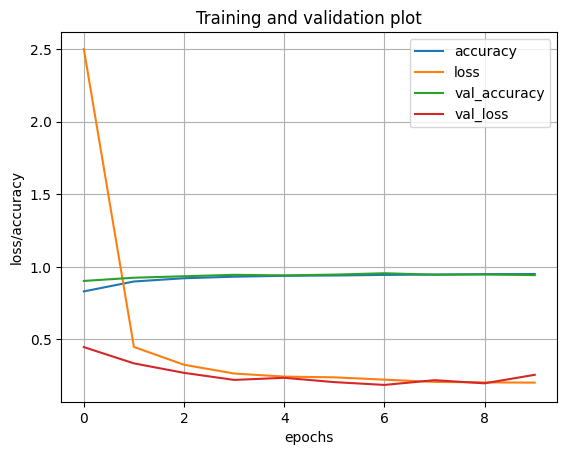

In [19]:
import pandas as pd
pd.DataFrame(history_ANN.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [20]:
test_loss, test_accuracy = ANN.evaluate(x_test, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9353 - loss: 0.3174
Test loss: 0.2919878661632538, Test accuracy: 0.9366999864578247


In [21]:
DNN = keras.models.Sequential()     # initiate the model
DNN.add(keras.layers.Flatten(input_shape = [28,28]))   # define input layer
DNN.add(keras.layers.Dense(600, activation = 'relu'))   # hidden layer
DNN.add(keras.layers.Dense(300, activation = 'relu'))   # hidden layer
DNN.add(keras.layers.Dense(100, activation = 'relu'))   # hidden layer
DNN.add(keras.layers.Dense(10, activation = 'softmax'))  # output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
DNN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 600)            │       471,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       180,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 682,410 (2.60 MB)

 Trainable params: 682,410 (2.60 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
DNN.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])

In [24]:
tbCallBack = keras.callbacks.TensorBoard(log_dir = "tbGraph/")

In [25]:
history_DNN = DNN.fit(x_train, y_train, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8413 - loss: 3.3567 - val_accuracy: 0.9483 - val_loss: 0.1942
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9455 - loss: 0.2033 - val_accuracy: 0.9540 - val_loss: 0.1732
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9563 - loss: 0.1573 - val_accuracy: 0.9597 - val_loss: 0.1534
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9618 - loss: 0.1285 - val_accuracy: 0.9670 - val_loss: 0.1238
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9682 - loss: 0.1098 - val_accuracy: 0.9635 - val_loss: 0.1332
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9726 - loss: 0.0955 - val_accuracy: 0.9680 - val_loss: 0.1384
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9757 - loss: 0.0860 - val_accuracy: 0.9577 - val_loss: 0.1715
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9778 - loss: 0

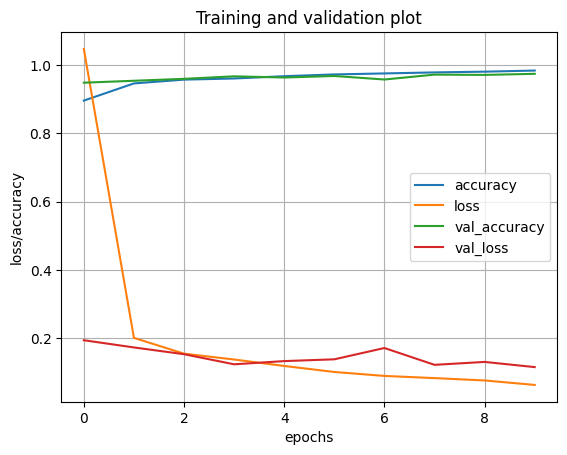

In [26]:
import pandas as pd
pd.DataFrame(history_DNN.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [27]:
test_loss, test_accuracy = DNN.evaluate(x_test, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9696 - loss: 0.1659
Test loss: 0.13452307879924774, Test accuracy: 0.9751999974250793


In [28]:
train_mask = (y_train == 0) | (y_train == 1)
x_train_binary = x_train[train_mask]
y_train_binary = y_train[train_mask]

test_mask = (y_test == 0) | (y_test == 1)
x_test_binary = x_test[test_mask]
y_test_binary = y_test[test_mask]

print("Original training data shape:", x_train.shape)
print("Filtered training data shape:", x_train_binary.shape)
print("Original testing data shape:", x_test.shape)
print("Filtered testing data shape:", x_test_binary.shape)

Original training data shape: (60000, 28, 28)
Filtered training data shape: (12665, 28, 28)
Original testing data shape: (10000, 28, 28)
Filtered testing data shape: (2115, 28, 28)


In [29]:
DNN_binary = keras.models.Sequential()
DNN_binary.add(keras.layers.Flatten(input_shape = [28,28]))
DNN_binary.add(keras.layers.Dense(600, activation = 'relu'))
DNN_binary.add(keras.layers.Dense(300, activation = 'relu'))
DNN_binary.add(keras.layers.Dense(100, activation = 'relu'))
DNN_binary.add(keras.layers.Dense(1, activation = 'sigmoid')) # Output layer for binary classification

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
DNN_binary.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [31]:
history_DNN_binary = DNN_binary.fit(x_train_binary, y_train_binary, epochs = 10, validation_split = 0.1)

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9799 - loss: 1.2198 - val_accuracy: 0.9968 - val_loss: 0.1505
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9975 - loss: 0.1815 - val_accuracy: 0.9961 - val_loss: 0.3010
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9985 - loss: 0.0917 - val_accuracy: 1.0000 - val_loss: 1.6847e-33
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9992 - loss: 0.0194 - val_accuracy: 1.0000 - val_loss: 1.3134e-24
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9996 - loss: 0.0111 - val_accuracy: 0.9992 - val_loss: 0.0245
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9985 - loss: 0.2085 - val_accuracy: 1.0000 - val_loss: 7.0978e-19
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9994 - loss: 0.0297 - val_accuracy: 1.0000 - val_loss: 2.9891e-25
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9985 - loss: 0.0696 -

In [32]:
test_loss_binary, test_accuracy_binary = DNN_binary.evaluate(x_test_binary, y_test_binary)
print("Test loss for binary classifier: {}, Test accuracy for binary classifier: {}".format(test_loss_binary, test_accuracy_binary))

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9999 - loss: 2.7143e-04
Test loss for binary classifier: 0.001047323108650744, Test accuracy for binary classifier: 0.9995272159576416


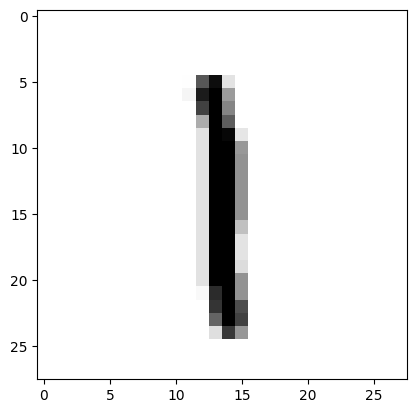

In [33]:
plt.imshow(x_train_binary[4],cmap='binary')
plt.show()

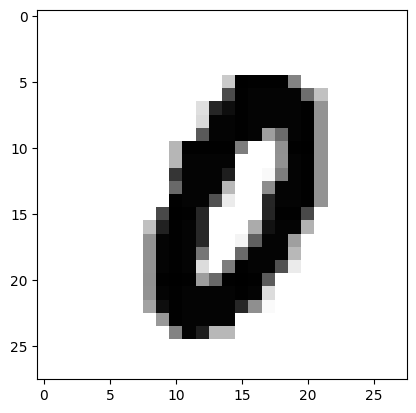

In [34]:
plt.imshow(x_train_binary[8],cmap='binary')
plt.show()



Apply normalization

In [45]:
x_mean = x_train . mean()
x_std = x_train.std()

x_train_stand = x_train - x_mean / (x_std)
x_test_stand = x_test - x_mean /(x_std)

In [36]:
(x_train,y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [42]:
history_DNN_normalized = DNN.fit(x_train, y_train, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9972 - loss: 0.0102 - val_accuracy: 0.9785 - val_loss: 0.1146
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9979 - loss: 0.0077 - val_accuracy: 0.9820 - val_loss: 0.1030
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9972 - loss: 0.0098 - val_accuracy: 0.9803 - val_loss: 0.1118
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9979 - loss: 0.0076 - val_accuracy: 0.9837 - val_loss: 0.1048
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9980 - loss: 0.0077 - val_accuracy: 0.9832 - val_loss: 0.1006
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9978 - loss: 0.0087 - val_accuracy: 0.9823 - val_loss: 0.0996
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9980 - loss: 0.0078 - val_accuracy: 0.9817 - val_loss: 0.1166
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9972 - loss: 